In [9]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn import tree

# 教師データをロード
df = pd.read_excel('xor_simple.xlsx', header=0);
data_array = df[['x', 'y']].values
class_array = df['class'].values

# 学習（決定木）
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data_array, class_array)

#学習後に、２つのデータを与えてそれらを分類。
#与えられた教師データの特徴から考えると
# x=2.0, y=1.0 であれば、クラス「0」に分類されるはず。
# x=1.0, y= -0.5であれば、クラス「1」に分類されるはず。
result = clf.predict([[2., 1.], [1., -0.5]])
print(result)

[0 1]


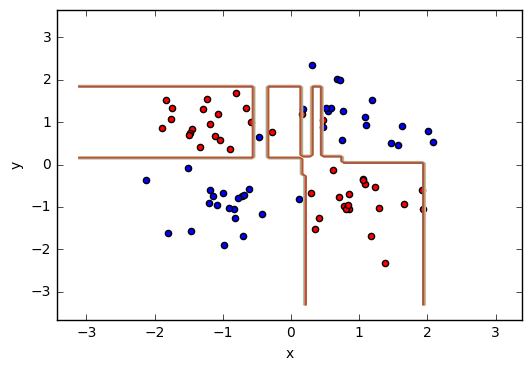

In [10]:
### 決定境界の可視化
import matplotlib.pyplot as plt

# Parameters for plot
n_classes = 2
plot_colors = "br"
plot_step = 0.05

#グラフ描画時の説明変数 x、yの最大値＆最小値を算出。
#グラフ描画のメッシュを定義
x_min, x_max = data_array[:, 0].min() - 1, data_array[:, 0].max() + 1
y_min, y_max = data_array[:, 1].min() - 1, data_array[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                      np.arange(y_min, y_max, plot_step))

#各メッシュ上での決定木による分類を計算
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#決定木による分類を等高線フィールドプロットでプロット
cs = plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')
plt.axis("tight")

#教師データも重ねてプロット
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(class_array == i)
    plt.scatter(data_array[idx, 0], data_array[idx, 1], c=color, label=['a','b'],cmap=plt.cm.Paired)
plt.axis("tight")

plt.show()

In [11]:
###決定木の中身を表示するためのdotファイルの出力
from sklearn.externals.six import StringIO

with open("xor_simple.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

f.close()

AttributeError: 'NoneType' object has no attribute 'close'